In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ensemble 

Here we'll explore a class of algorithms based on decision trees.
Decision trees at their root are extremely intuitive.  They
encode a series of "if" and "else" choices, similar to how a person might make a decision.
However, which questions to ask, and how to proceed for each answer is entirely learned from the data.

For example, if you wanted to create a guide to identifying an animal found in nature, you
might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.

One of the main benefit of tree-based models is that they require little preprocessing of the data.
They can work with variables of different types (continuous and discrete) and are invariant to scaling of the features.

Another benefit is that tree-based models are what is called "nonparametric", which means they don't have a fix set of parameters to learn. Instead, a tree model can become more and more flexible, if given more data.
In other words, the number of free parameters grows with the number of samples and is not fixed, as for example in linear models.


#### Entropy
Shannon's entropy is defined for a system with N possible states as follows:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

where $p_i$ is the probability of finding the system in the $i$-th state. This is a very important concept used in physics, information theory, and other areas. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa. This will help us formalize "effective data splitting", which we alluded to in the context of "20 Questions".

#### Example
Let's look at  how entropy can help us to find goods features to build a decision tree, using toy example. Let's predict the color of the ball based on its position.

<img align='center' src='image/decision_tree3.png'><br>

There are 9 blue balls and 11 yellow balls. If we randomly pull out a ball, then it will be blue with probability $p_1=\frac{9}{20}$ and yellow with probability $p_2=\frac{11}{20}$, which gives us an entropy $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. This value by itself may not tell us much, but let's see how the value changes if we were to break the balls into two groups: with the position less than or equal to 12 and greater than 12.

<img align='center' src='image/balls2.png'><br>


The left group has 13 balls, 8 blue and 5 yellow. The entropy of this group is $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. The right group has 7 balls, 1 blue and 6 yellow. The entropy of the right group is $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is, in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. Formally, the information gain (IG) for a split based on the variable $Q$ (in this example it's a variable "$x \leq 12$") is defined as

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups ($q = 2$), one with 13 elements ($N_1 = 13$), the other with 7 ($N_2 = 7$). Therefore, we can compute the information gain as

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

By separating the balls into two groups by splitting on "coordinate is less than or equal to 12" we have a more ordered system. We can continue to separate them into groups until the balls in each group are all of the same color.

<img align='center' src='image/topic3_credit_scoring_entropy.png'><br>

For the right group, we can easily see that we only need one extra partition using "coordinate less than or equal to 18". But, for the left group, we need three more. Note that the entropy of a group where all of the balls are the same color is equal to 0 ($\log_2{1} = 0$).

We have successfully constructed a decision tree that predicts ball color based on its position. This decision tree may not work well if we add any balls because it has perfectly fit to the training set (initial 20 balls). If we wanted to do well in that case, a tree with fewer "questions" or splits would be more accurate, even if it does not perfectly fit the training set. 

## Exercise: Implement a function for calculating entropy.

In [13]:
a = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
b = np.array([1, 0, 0, 0, 0, 0, 0])

def entropy(arr):
    pass
    

In [14]:
np.bincount(a)

array([5, 8])

In [15]:
probs = np.unique(a, return_counts=True)[1] / len(a)
-np.sum(probs * np.log2(probs))

0.9612366047228759

In [16]:
print(entropy(a)) # 0.9612366047228759
print(entropy(b)) # 0.5916727785823275

None
None


## Decision Tree Regression

A decision tree is a simple binary classification tree that is
similar to nearest neighbor classification.  It can be used as follows:

<IPython.core.display.Javascript object>


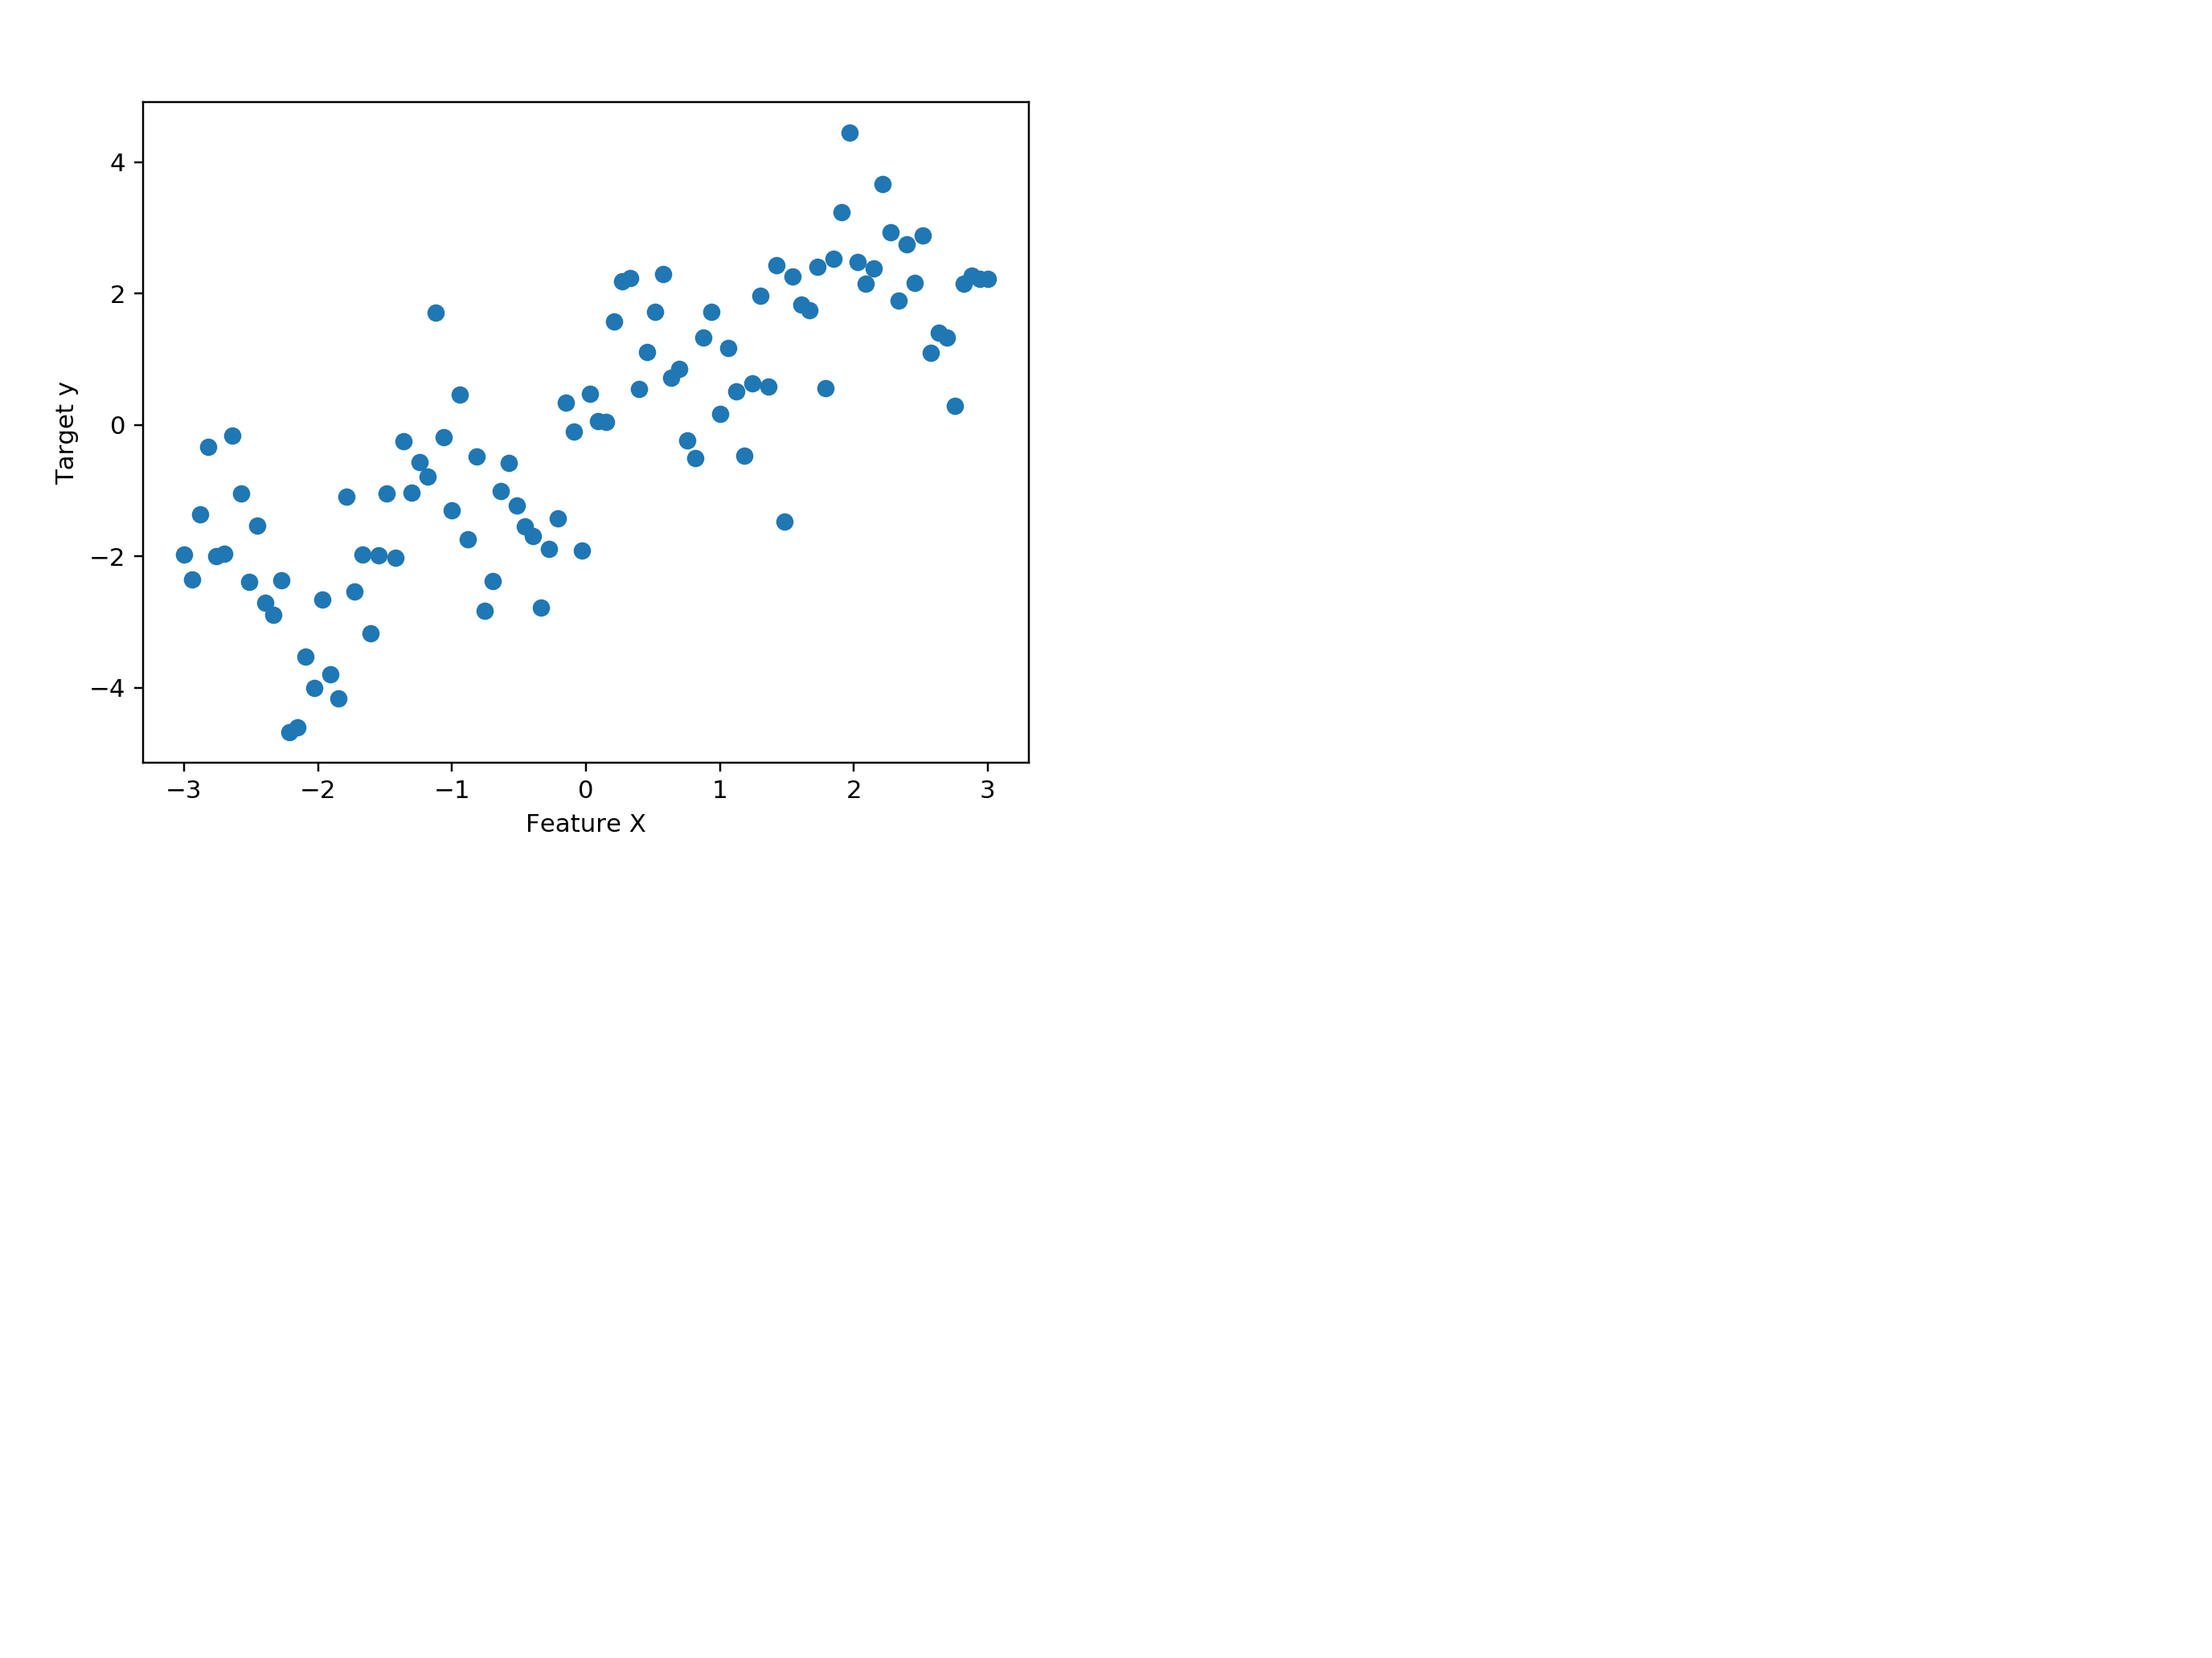

In [17]:
from figures import make_dataset
x, y = make_dataset()
X = x.reshape(-1, 1)

plt.figure()
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.scatter(X, y);

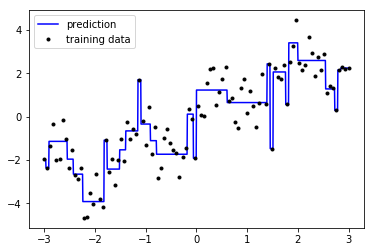

In [30]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X, y)

X_fit = np.linspace(-3, 3, 1000).reshape((-1, 1))
y_fit_1 = reg.predict(X_fit)

plt.figure()
plt.plot(X_fit.ravel(), y_fit_1, color='blue', label="prediction")
plt.plot(X.ravel(), y, '.k', label="training data")
plt.legend(loc="best");

A single decision tree allows us to estimate the signal in a non-parametric way,
but clearly has some issues.  In some regions, the model shows high bias and
under-fits the data.
(seen in the long flat lines which don't follow the contours of the data),
while in other regions the model shows high variance and over-fits the data
(reflected in the narrow spikes which are influenced by noise in single points).

Decision Tree Classification
==================
Decision tree classification work very similarly, by assigning all points within a leaf the majority class in that leaf:


<IPython.core.display.Javascript object>


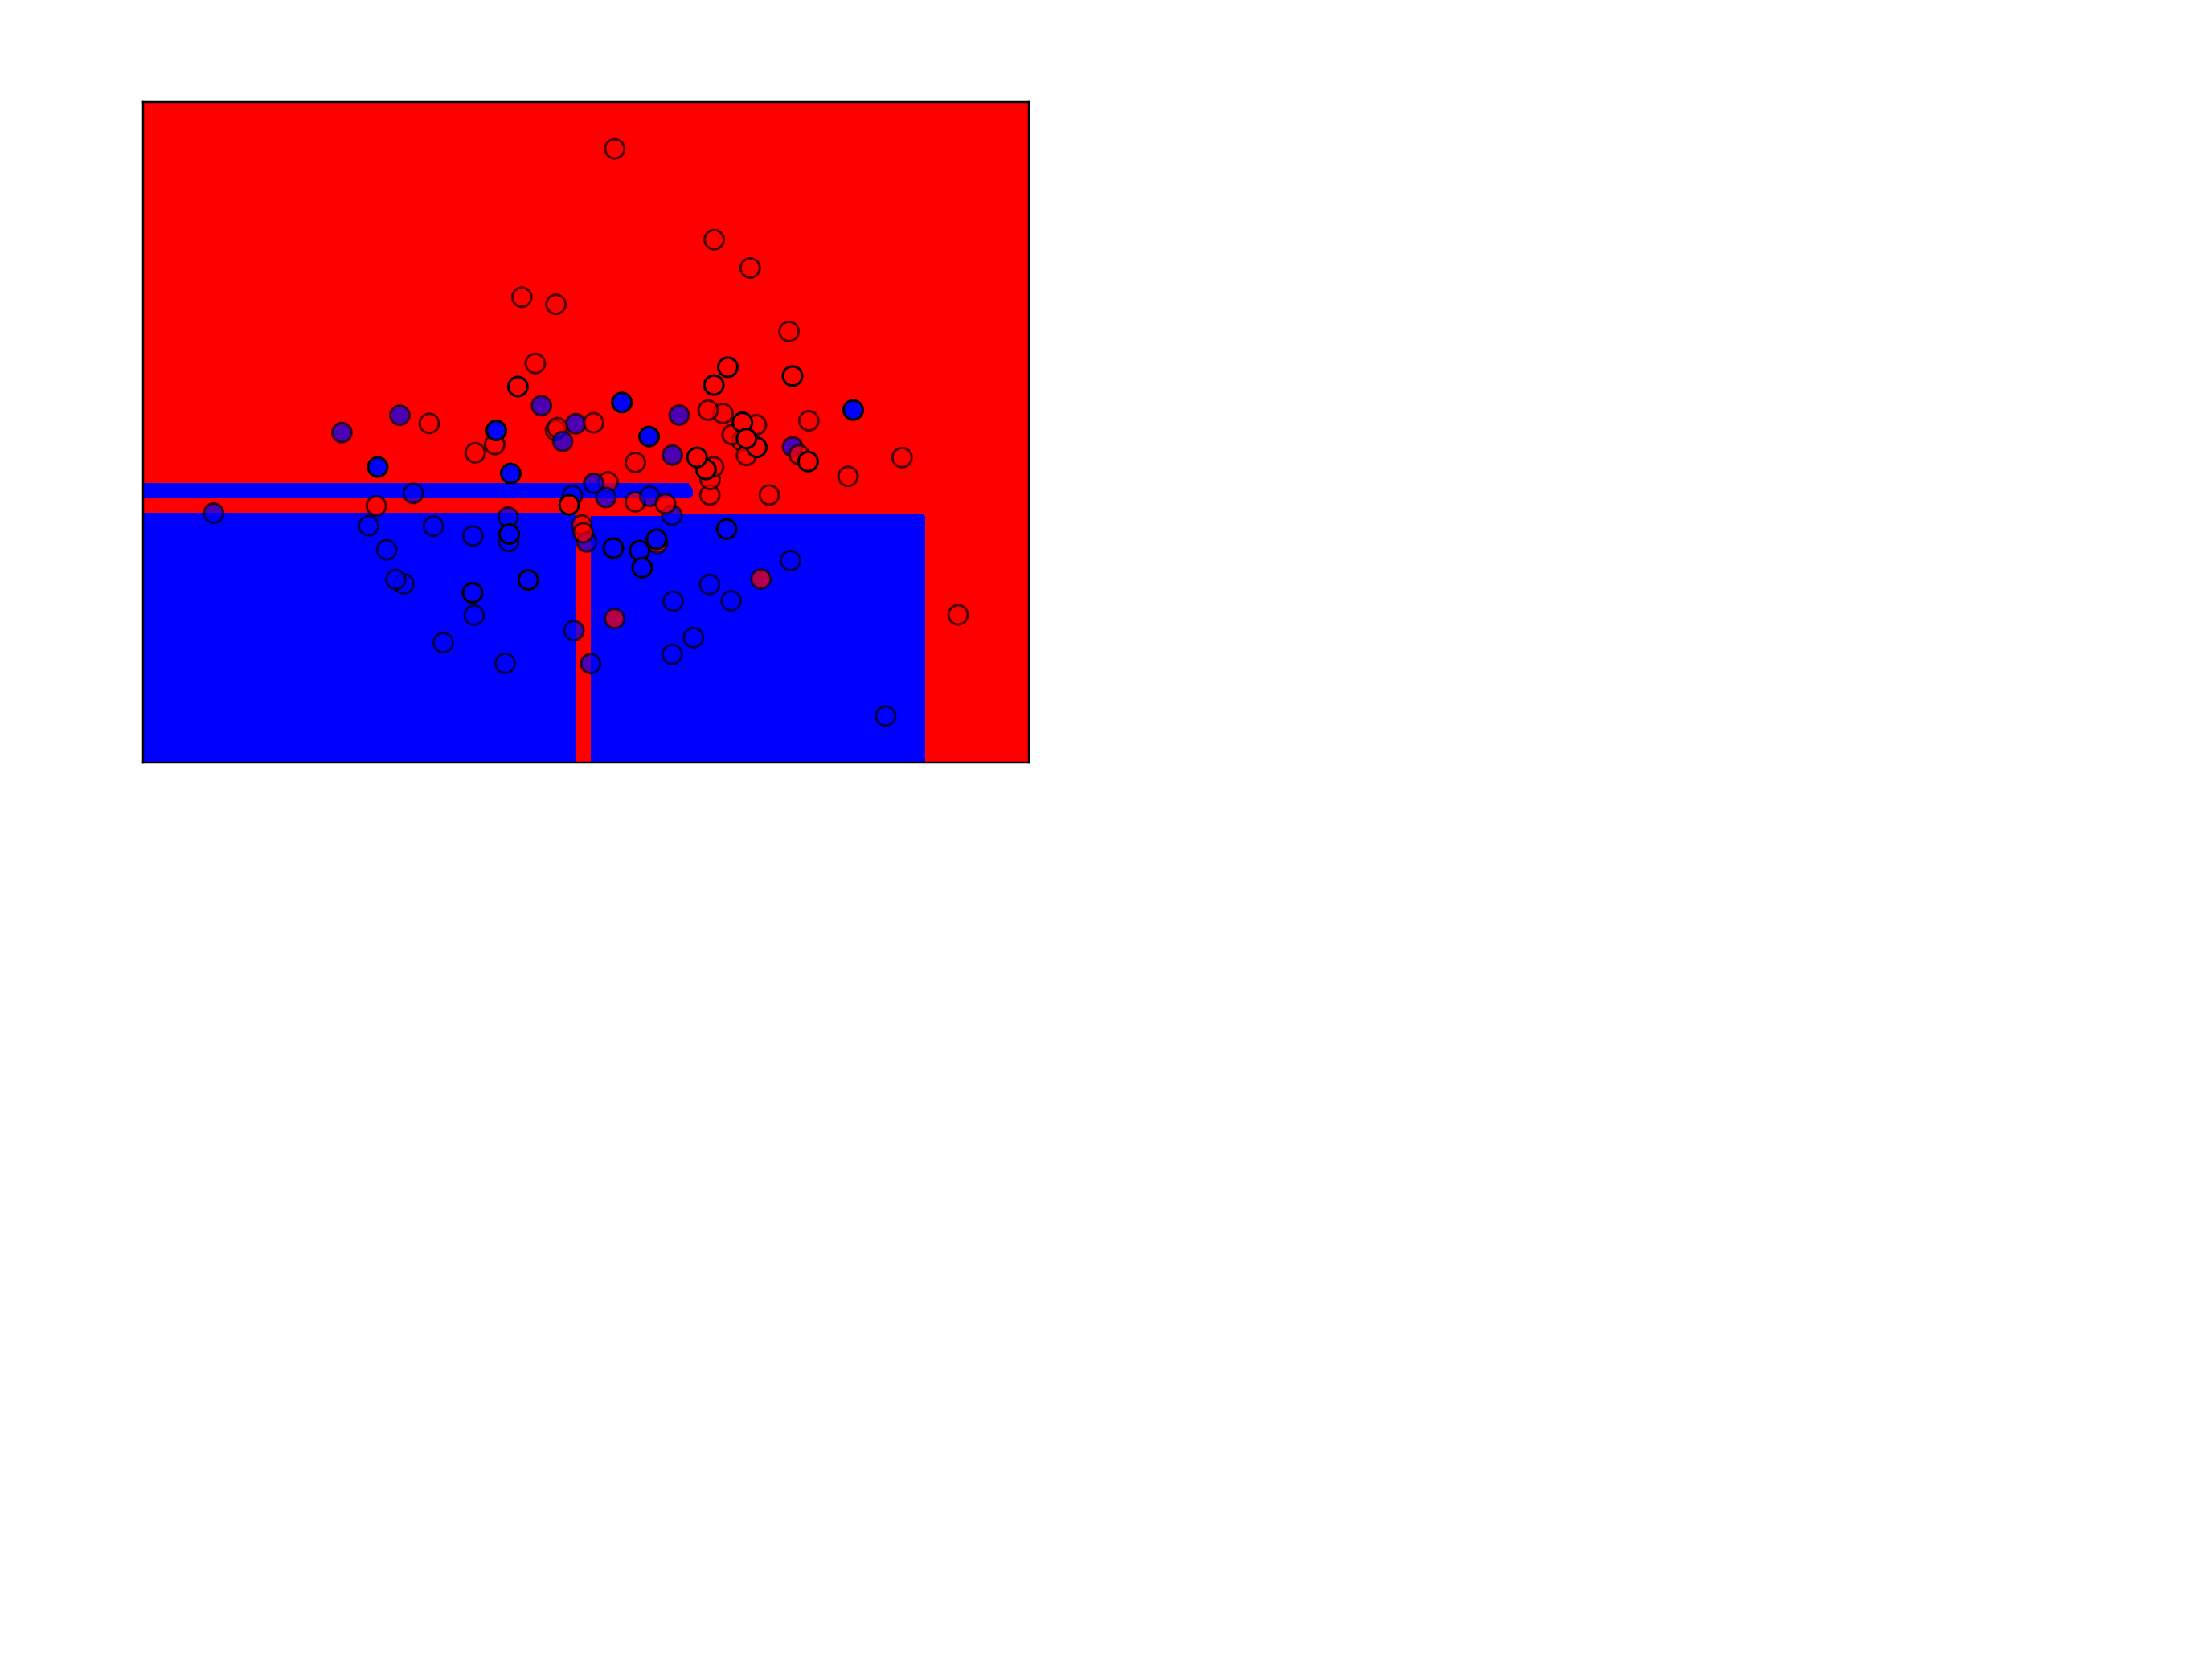

In [18]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from figures import plot_2d_separator


X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

plt.figure()
plot_2d_separator(clf, X, fill=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['b', 'r'])[y_train], s=60, alpha=.7, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.array(['b', 'r'])[y_test], s=60, edgecolor='k');

There are many parameter that control the complexity of a tree, but the one that might be easiest to understand is the maximum depth. This limits how finely the tree can partition the input space, or how many "if-else" questions can be asked before deciding which class a sample lies in.

This parameter is important to tune for trees and tree-based models. The interactive plot below shows how underfit and overfit looks like for this model. Having a ``max_depth`` of 1 is clearly an underfit model, while a depth of 7 or 8 clearly overfits. The maximum depth a tree can be grown at for this dataset is 8, at which point each leave only contains samples from a single class. This is known as all leaves being "pure."

In the interactive plot below, the regions are assigned blue and red colors to indicate the predicted class for that region. The shade of the color indicates the predicted probability for that class (darker = higher probability), while yellow regions indicate an equal predicted probability for either class.

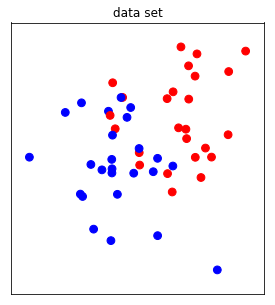

In [22]:
%matplotlib inline
from figures import plot_tree_interactive
plot_tree_interactive()

Decision trees are fast to train, easy to understand, and often lead to interpretable models. However, single trees often tend to overfit the training data. Playing with the slider above you might notice that the model starts to overfit even before it has a good separation between the classes.

Therefore, in practice it is more common to combine multiple trees to produce models that generalize better. The most common methods for combining trees are random forests and gradient boosted trees.


## Random Forests

Random forests are simply many trees, built on different random subsets (drawn with replacement) of the data, and using different random subsets (drawn without replacement) of the features for each split.
This makes the trees different from each other, and makes them overfit to different aspects. Then, their predictions are averaged, leading to a smoother estimate that overfits less.


## Selecting the Optimal Estimator via Cross-Validation

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=200)
parameters = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[5, 7, 9]}

clf_grid = GridSearchCV(rf, parameters, n_jobs=-1, cv=3)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['sqrt', 'log2', 10], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
clf_grid.score(X_train, y_train)

1.0

In [11]:
clf_grid.score(X_test, y_test)

0.9733333333333334

These are the hyperparameters that are important in building a model:

- `n_estimators` — the number of trees in the forest;
- `criterion` — the function used to measure the quality of a split;
- `max_features` — the number of features to consider when looking for the best split;
- `min_samples_leaf` — the minimum number of samples required to be at a leaf node;
- `max_depth` — the maximum depth of the tree.

#### Practice with random forests using churn data
 
We will use the telecom churn data. This is a classification problem, and we can use AUC for model evaluation.

Let's build a simple random forest model with default parameters as a baseline. To make it simple, let's just use numeric features.

In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Load data
df = pd.read_csv("Data/telecom_churn.csv")

# Choose the numeric features
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)
        
# Divide the dataset into the input and target
X = df[cols].copy() 
y = np.asarray(df["Churn"], dtype='int8')

# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier with the default parameters 
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train it on the training set
results = cross_val_score(rfc, X, y, cv=skf, scoring='roc_auc')

# Evaluate the accuracy on the test set
print("CV AUC score: {:.2f}".format(results.mean()))

CV AUC score: 0.84


We have AUC score up to 0.84. Let's use gridsearch to find best hyperparameters try to improve this result.

In [26]:
# Initialize the set of parameters for exhaustive search and fit 
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7],
              'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(random_state=42, 
                             n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=5, verbose=1, scoring='roc_auc')
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   31.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [27]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=7, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 0.8751992055214746)

## Another option: Gradient Boosting

Another Ensemble method that can be useful is *Boosting*: here, rather than
looking at 200 (say) parallel estimators, We construct a chain of 200 estimators
which iteratively refine the results of the previous estimator.
The idea is that by sequentially applying very fast, simple models, we can get a
total model error which is better than any of the individual pieces.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9891044494336132
0.8644345872383977


## Exercise: Cross-validating Gradient Boosting:
Use a grid search to optimize the `learning_rate` and `max_depth` for a Gradient Boosted
Decision tree on the digits data set.

In [56]:
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'learning_rate': [0.01, 0.1, 0.1, 0.5, 1.0],
              'max_depth':[1, 3, 5, 7, 9]}

# split the dataset, apply grid-search

## Feature importance

Both RandomForest and GradientBoosting objects expose a `feature_importances_` attribute when fitted. This attribute is one of the most powerful feature of these models. They basically quantify how much each feature contributes to gain in performance in the nodes of the different trees.

In [67]:
# X, y = X_digits[y_digits < 2], y_digits[y_digits < 2]

rf = RandomForestClassifier(n_estimators=300, n_jobs=1)
rf.fit(X, y)
print(rf.feature_importances_)  # one value per feature

[0.00000000e+00 2.49395761e-03 2.12706074e-02 9.11471828e-03
 9.60593440e-03 2.15947879e-02 9.42889430e-03 6.56951861e-04
 4.74359181e-05 1.03342293e-02 2.61487108e-02 6.90459361e-03
 1.58850546e-02 2.65354584e-02 5.43740259e-03 6.06651258e-04
 7.76190353e-05 8.04144442e-03 2.16522677e-02 2.57872843e-02
 3.02540511e-02 5.07508868e-02 9.24512396e-03 3.90698713e-04
 5.27066661e-05 1.29875226e-02 4.18367166e-02 2.45381151e-02
 3.34526539e-02 2.37425452e-02 2.80174745e-02 3.36897728e-05
 0.00000000e+00 3.09810845e-02 2.61338705e-02 1.88597978e-02
 3.76142138e-02 1.98447963e-02 2.64860707e-02 0.00000000e+00
 3.64174305e-05 1.08431434e-02 3.72400361e-02 4.29829962e-02
 2.13190559e-02 1.85301169e-02 1.89153688e-02 9.97221653e-05
 2.64783715e-05 2.43494257e-03 1.73838950e-02 2.17718999e-02
 1.36031028e-02 2.19919955e-02 2.64554163e-02 1.47519779e-03
 3.35910691e-05 1.87507804e-03 2.01145972e-02 1.10469134e-02
 2.61473075e-02 2.85458396e-02 1.68493270e-02 3.43153903e-03]


### Practical example

Let's consider the results of a survey given to visitors of hostels listed on Booking.com and TripAdvisor.com. Our features here are the average ratings for different categories include service quality, room condition, value for money, etc. Our target variable is the hostel's overall rating on the website.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

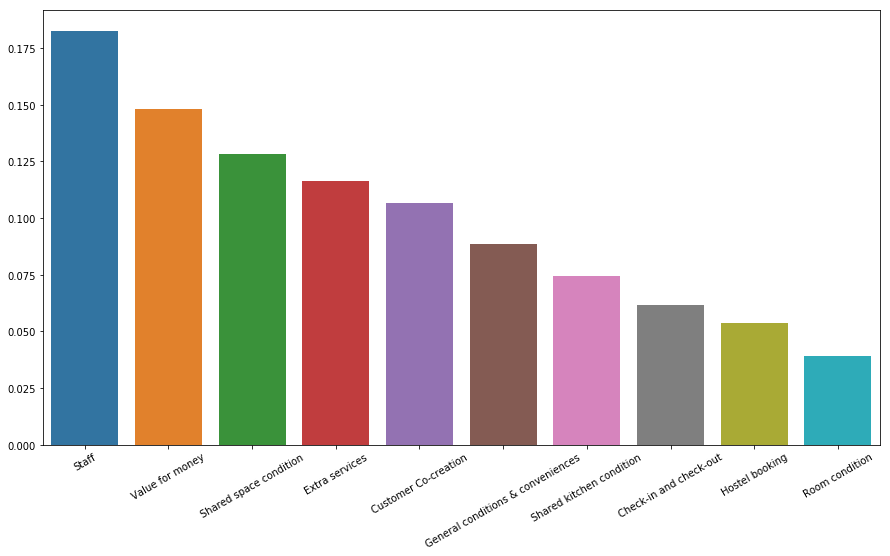

In [60]:
hostel_data = pd.read_csv("Data/hostel_factors.csv")
features = ["Staff",
"Hostel booking",
"Check-in and check-out",
"Room condition",
"Shared kitchen condition",
"Shared space condition",
"Extra services",
"General conditions & conveniences",
"Value for money",
"Customer Co-creation"]

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

feat_importances = sorted(list(zip(features, importances)), 
                          key=lambda x:x[1], reverse=True)


import seaborn as sns

plt.figure(figsize=(15,8))

sns.barplot([a[0] for a in feat_importances], 
            [b[1] for b in feat_importances])

plt.xticks(rotation=30)

In [66]:
np.sum(importances, dtype = np.float32)

0.99999994

What can you conclude from the the figure?

## Exercise

- Use the telecom churn data from above.
- Use all type of data, not just numerical data.
- Split the data into train and test.
- Don't use the test data until final evaluation.
- Use Logistic regression, random forest and gradient boosting classifier. 
- Tune the hyperparameters. Evaluate the model with AUC.
- Plot the feature importances for random forest and gradient boosting model.